## Librerias

In [1]:
import os
import statistics
import time

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

## Funciones varias

In [3]:
#Funcion que retorna el arreglo de matriz de confusion promedio y desviacion estandar.

def matrices(conf_mat): 
    #==============PROMEDIO CM ==============#
    suma = conf_mat[0]-conf_mat[0]
    for i in range(5):
      suma= suma + conf_mat[i]
    promedio = suma/5     #Arreglo con el promedio de cada valor de la matriz

    #==============DESVIACION CM==============#
    suma2= conf_mat[0]-conf_mat[0]
    desv= []

    for i in range(5):
      vac= conf_mat[0]-conf_mat[0]
      for m in range(conf_mat[0].shape[0]):
        for n in range(conf_mat[0].shape[0]):
          vac[m][n] = (conf_mat[i][m][n] - promedio[m][n])**2 # Con esto se realiza en cada valor de la matriz la funcion (x-promedio)**2
      desv.append(vac)

    for i in range(5):
      suma2= suma2 + desv[i] #Con esto se realiza la sumatoria de los datos en cada valor de la matriz
    promedio2 = suma2/5 #Se divide la sumatoria en la cantidad de datos 

    for m in range(conf_mat[0].shape[0]):
      for n in range(conf_mat[0].shape[0]):
        promedio2[m][n] = promedio2[m][n]**0.5 #Se aplica finalmente la raiz cuadrada a cada valor
    #====================================#
    CM_DESV = conf_mat[0]-conf_mat[0]
    for m in range(conf_mat[0].shape[0]):
      for n in range(conf_mat[0].shape[0]):
        CM_DESV[m][n] = round(promedio2[m][n]*100,1) #Se añaden las desviaciones a un arreglo 

    return (promedio, CM_DESV)

In [4]:
#Funcion que retorna las metricas macro

def metricas(mc):
    presicion=[]
    recall = []
    f1_score=[]

    for l in range(len(mc)):
        columna= mc[:,l]
        fila =mc[l,:]
        pres=columna[l]/sum(columna)
        reca=fila[l]/sum(fila)
        presicion.append(pres)
        recall.append(reca)
        f1_score.append(2*pres*reca/(pres+reca))

    macro_presicion = statistics.mean(presicion)
    macro_recall = statistics.mean(recall)
    macro_f1_score = statistics.mean(f1_score)
    
    return macro_presicion,macro_recall,macro_f1_score

In [18]:
#Funcion que grafica una matriz de confusion promedio con desviacion estandar

def plot_confusion_matrix_2(cm, cms,  classes,
                          cmap=plt.cm.Blues, fontsize_valores=12, fontsize_label=10, fontsize_eje = 12):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize= fontsize_label)
    plt.yticks(tick_marks, classes, fontsize= fontsize_label)
    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.1f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=fontsize_valores,
                     color="white" if cm[i, j] > thresh else "black")



    plt.tight_layout()
    plt.ylabel('True label', fontsize= fontsize_eje)
    plt.xlabel('Predicted label', fontsize= fontsize_eje)

In [ ]:
# Truco para eliminar datos que tengan valores infinitos para hacer el ranking con todas las caracteristicas
lista_inf_CEF=[]
valores1=dataset_subclases[["GP_DRW_sigma_b"]].values
suma=0
for i in range(len(valores1)):
    if valores1[i].astype(np.float32) == np.inf:
        lista_inf_CEF.append(i)
        suma+=1
print(suma)

valores2=dataset_subclases[["GP_DRW_tau_r"]].values
suma=0
for i in range(len(valores1)):
    if valores2[i].astype(np.float32) == np.inf:
        lista_inf_CEF.append(i)
        suma+=1
print(suma)

valores3=dataset_subclases[["GP_DRW_tau_b"]].values
suma=0
for i in range(len(valores1)):
    if valores3[i].astype(np.float32) == np.inf:
        lista_inf_CEF.append(i)
        suma+=1
print(suma)

#Con esto se eliminan todos los vectores que posean valores infinitos
#lista_inf_final_CEF=[]
#for x in lista_inf_CEF:
#    if x not in lista_inf_final_CEF:
#        lista_inf_final_CEF.append(x)

In [6]:
#Funciones para hacer cross-validation con k=5 y funcion objetivo macro_recall

################################ Para BRF ################################
brf= BalancedRandomForestClassifier()
parametros= {'n_estimators':[600,700,800],
}

clasificador= GridSearchCV(brf, parametros, cv=5, scoring="recall_macro")
#clasificador.fit(train_clases.values, np.ravel(label_train_clases.values))# Se le entrega el set de entrenamiento respectivo

#Se imprimen los mejores parametros
#clasificador.best_params_

## Dataset

In [7]:
dataset_RRL=pd.read_excel(".\Features\subclases_RRL_final.xlsx")
dataset_EB=pd.read_excel(".\Features\subclases_EB_final_menos_sub.xlsx")
dataset_CEF=pd.read_excel(".\Features\subclases_cefeidas_final_3.xlsx")

In [8]:
train_clases_RRL , test_clases_RRL = train_test_split(dataset_RRL, test_size=0.2, random_state=42)
train_clases_EB , test_clases_EB = train_test_split(dataset_EB, test_size=0.2, random_state=42)
train_clases_CEF , test_clases_CEF = train_test_split(dataset_CEF, test_size=0.2, random_state=42)

train_final = pd.concat([train_clases_RRL,train_clases_EB,train_clases_CEF])
test_final = pd.concat([test_clases_RRL,test_clases_EB,test_clases_CEF])

caracteristicas_malas = ["clase","subclase","subclase2",'oid']
caracteristicas_irrelevantes = ["GP_DRW_sigma_b","GP_DRW_tau_r","GP_DRW_tau_b",'MedianBRP_b', 'Harmonics_mse_b', 'SmallKurtosis_b', 'GP_DRW_sigma_r', 'Beyond1Std_b', 'Std_r', 'Skew_b', 'Multiband_period', 'Skew_r', 'Mean_r', 'SmallKurtosis_r', 'Beyond1Std_r', 'MedianBRP_r', 'StetsonK_r', 'Std_b', 'Con_r', 'Pvar_r', 'Autocor_length_b', 'delta_period_r', 'Pvar_b', 'PairSlopeTrend_r', 'SF_ML_gamma_r', 'SF_ML_gamma_b', 'SF_ML_amplitude_r', 'SF_ML_amplitude_b', 'MHPS_PN_flag_r', 'MHPS_PN_flag_b', 'ExcessVar_r', 'ExcessVar_b', 'AndersonDarling_r', 'AndersonDarling_b']

label_train_subclases= train_final[['subclase']]
train_subclases = train_final.drop(columns=caracteristicas_malas+caracteristicas_irrelevantes)

label_test_subclases= test_final[['subclase']]
test_subclases = test_final.drop(columns=caracteristicas_malas+caracteristicas_irrelevantes)


In [17]:
112-len(caracteristicas_irrelevantes)

78

## Ranking

In [12]:
ranking_clases=[]
for feature in zip(clf_BRF_subclases.feature_importances_, train_subclases.columns):
    ranking_clases.append(feature)

ranking_clases.sort()
ranking_clases.reverse()

In [37]:
ranking_clases

[(0.034891787764521384, 'MedianAbsDev_b'),
 (0.028776838775820823, 'Q31_b'),
 (0.02772883819612227, 'iqr_b'),
 (0.025367762636522035, 'Amplitude_r'),
 (0.022507287810394745, 'PercentAmplitude_r'),
 (0.022180852859144326, 'MHPS_low_r'),
 (0.021494285931715738, 'Gskew_b'),
 (0.01989267984028555, 'MedianAbsDev_r'),
 (0.019516575208385404, 'PercentAmplitude_b'),
 (0.019357175264826616, 'Amplitude_b'),
 (0.01819045558933403, 'Gskew_r'),
 (0.017544822027133603, 'MHPS_low_b'),
 (0.01564794097432078, 'Q31_r'),
 (0.015366562125352475, 'iqr_r'),
 (0.011186411410115053, 'Harmonics_phase_5_b'),
 (0.010879719691343694, 'Eta_e_b'),
 (0.010354045552539128, 'Meanvariance_r'),
 (0.010137434527908974, 'MHPS_ratio_b'),
 (0.010099038007087705, 'Harmonics_phase_6_r'),
 (0.009990854729599243, 'Eta_e_r'),
 (0.009916375392615577, 'MaxSlope_b'),
 (0.009776901740797601, 'MHPS_high_b'),
 (0.009748703618482592, 'MaxSlope_r'),
 (0.009727045896645962, 'Meanvariance_b'),
 (0.009693285526619907, 'Harmonics_phase_4_b'

In [19]:
caracteristicas_irrelevantes = []
for i in range(112-81):
    caracteristicas_irrelevantes.append(ranking_clases[i+81][1])

In [20]:
print(caracteristicas_irrelevantes)

['MedianBRP_b', 'Harmonics_mse_b', 'SmallKurtosis_b', 'GP_DRW_sigma_r', 'Beyond1Std_b', 'Std_r', 'Skew_b', 'Multiband_period', 'Skew_r', 'Mean_r', 'SmallKurtosis_r', 'Beyond1Std_r', 'MedianBRP_r', 'StetsonK_r', 'Std_b', 'Con_r', 'Pvar_r', 'Autocor_length_b', 'delta_period_r', 'Pvar_b', 'PairSlopeTrend_r', 'SF_ML_gamma_r', 'SF_ML_gamma_b', 'SF_ML_amplitude_r', 'SF_ML_amplitude_b', 'MHPS_PN_flag_r', 'MHPS_PN_flag_b', 'ExcessVar_r', 'ExcessVar_b', 'AndersonDarling_r', 'AndersonDarling_b']


In [14]:
suma_lista = []
numero_caracteristicas = []

suma = 0
for i in range(len(ranking_clases)):
    suma+=ranking_clases[i][0]
    suma_lista.append(suma)
    numero_caracteristicas.append(i+1)

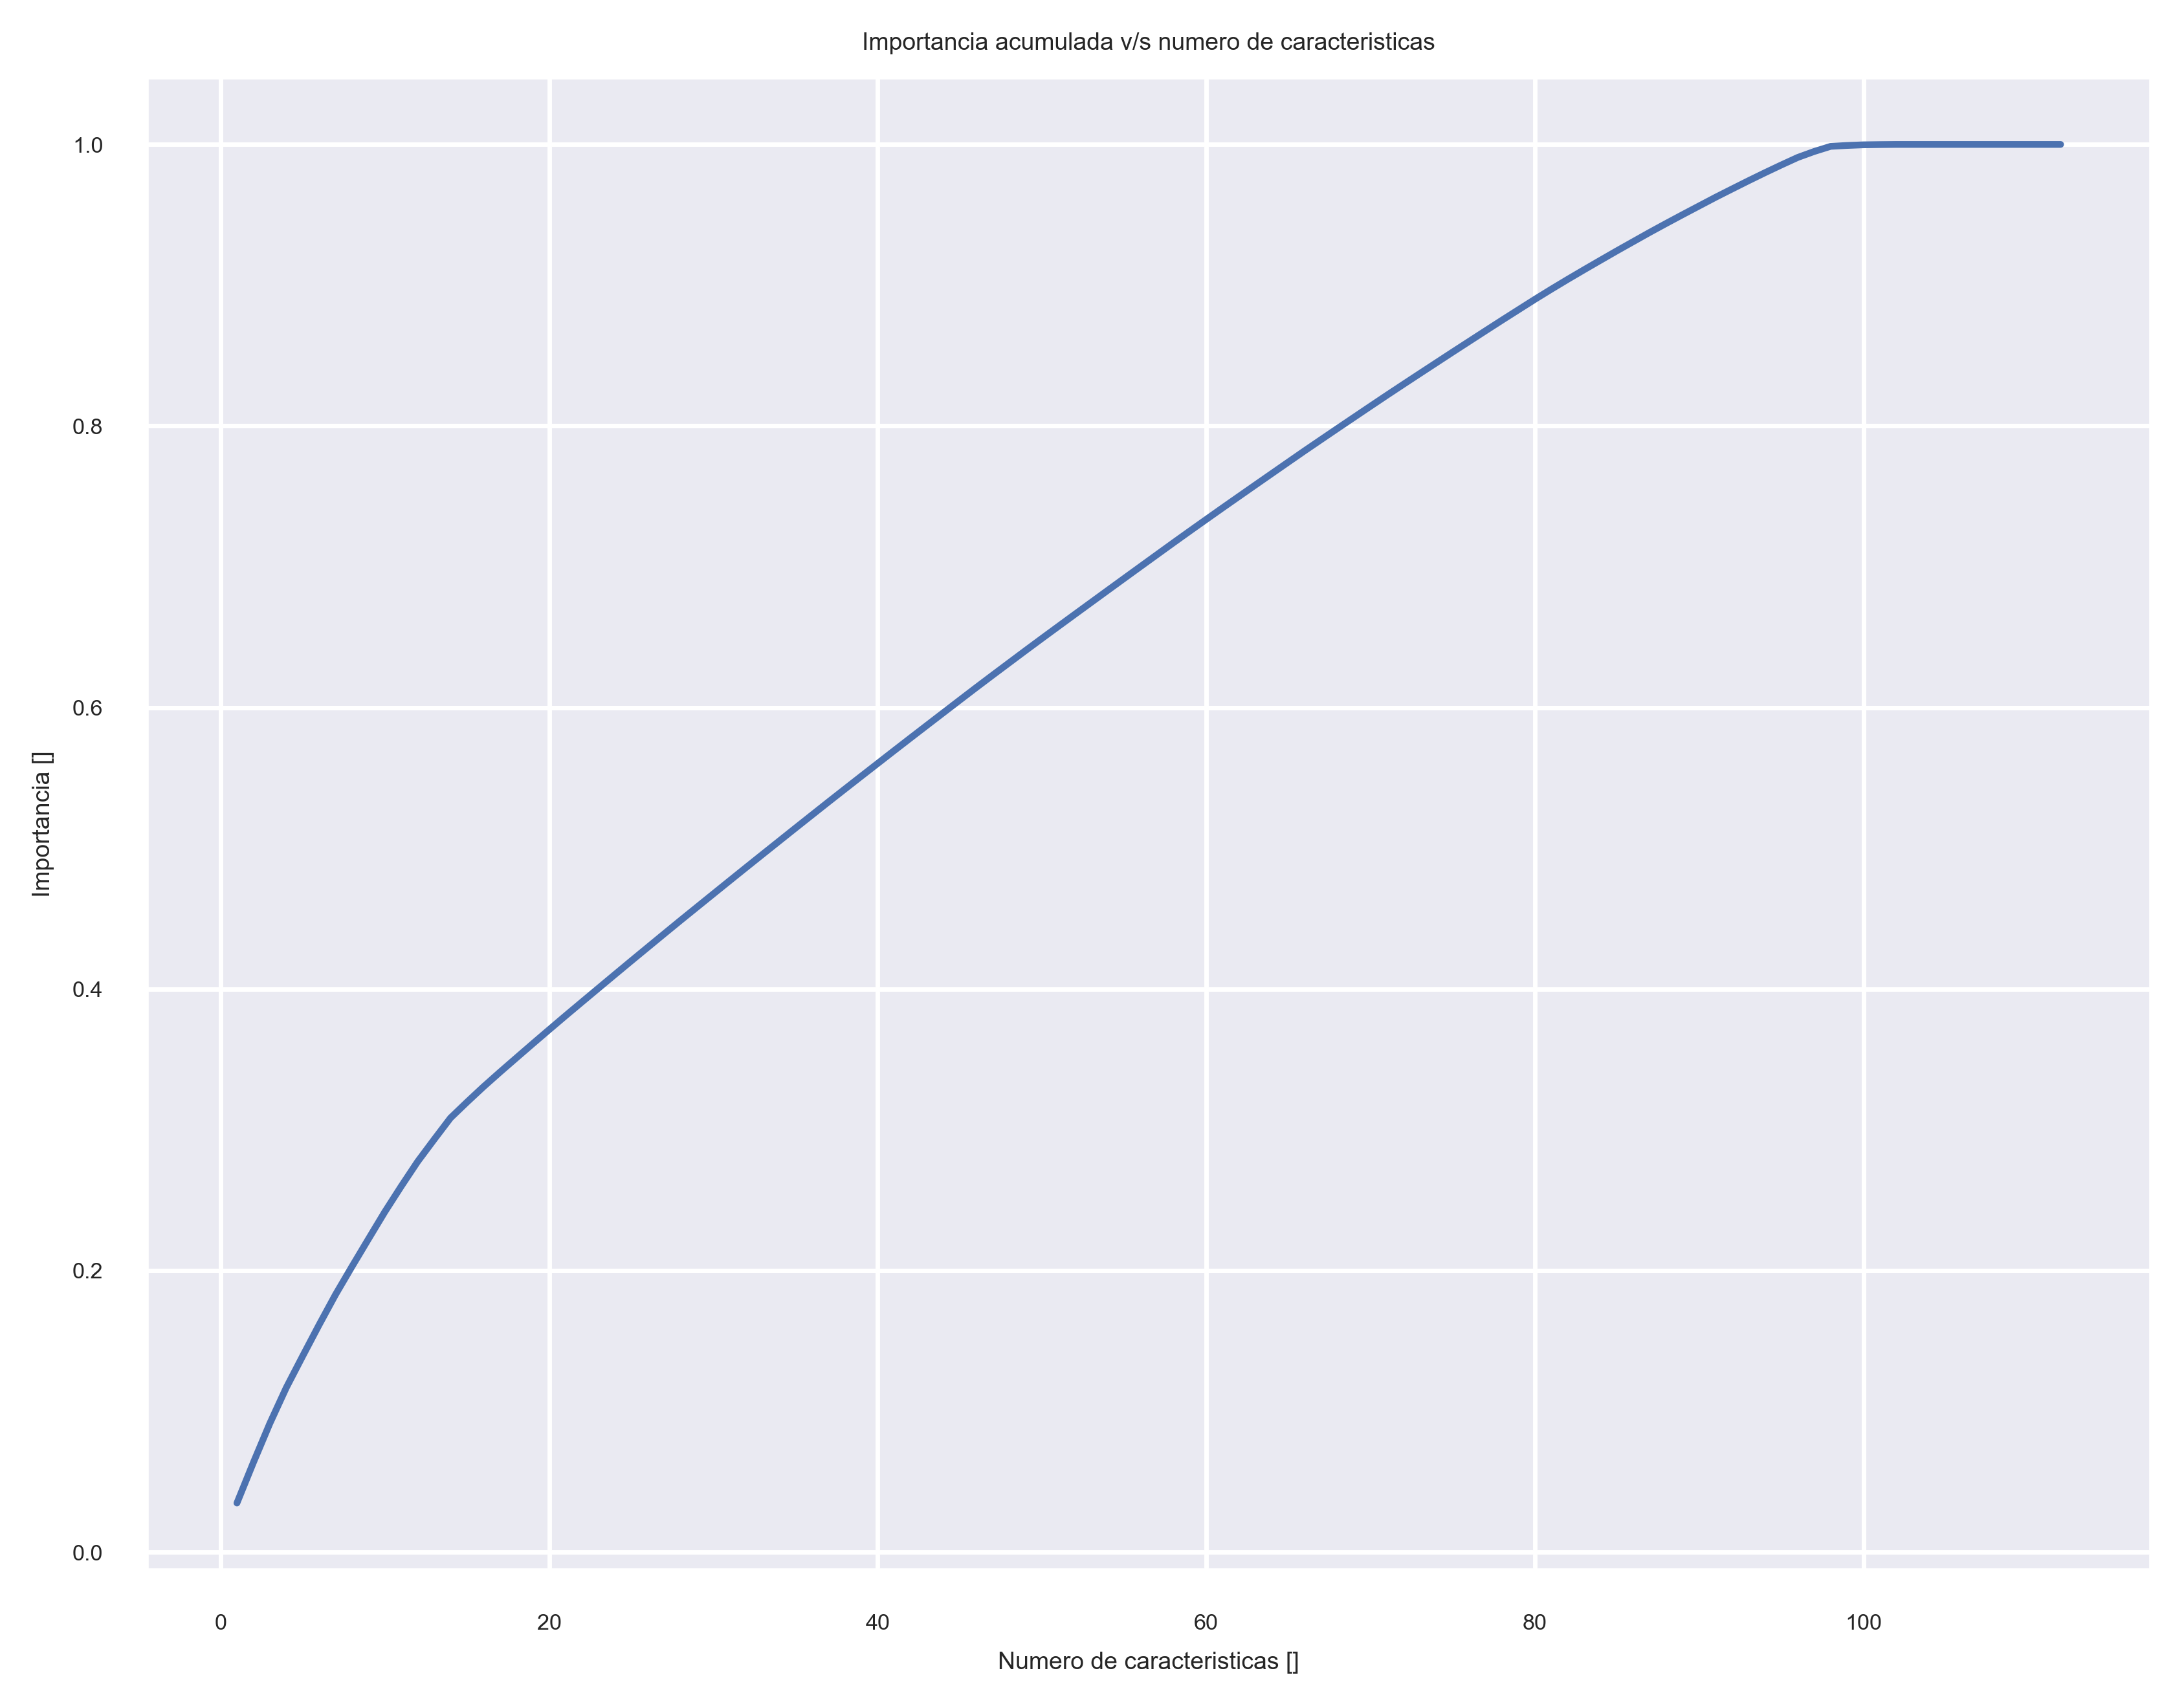

In [15]:
plt.figure(figsize=(8, 6), dpi=500)
plt.plot(numero_caracteristicas, suma_lista)
plt.xlabel("Numero de caracteristicas []")
plt.ylabel("Importancia []")
plt.title("Importancia acumulada v/s numero de caracteristicas")
plt.show()

In [17]:
suma_lista = []
numero_caracteristicas = []

suma = 0
for i in range(len(ranking_clases)):
    if suma < 0.95:
        suma += ranking_clases[i][0]
        print(ranking_clases[i][1])
    if suma >= 0.95:
        print(i)
        break


MedianAbsDev_b
Q31_b
iqr_b
Amplitude_r
PercentAmplitude_r
MHPS_low_r
Gskew_b
MedianAbsDev_r
PercentAmplitude_b
Amplitude_b
Gskew_r
MHPS_low_b
Q31_r
iqr_r
Harmonics_phase_5_b
Eta_e_b
Meanvariance_r
MHPS_ratio_b
Harmonics_phase_6_r
Eta_e_r
MaxSlope_b
MHPS_high_b
MaxSlope_r
Meanvariance_b
Harmonics_phase_4_b
Harmonics_phase_3_b
Power_rate_1/2
IAR_phi_r
MHPS_high_r
Psi_CS_b
LinearTrend_r
Harmonics_phase_7_b
Harmonics_phase_6_b
Rcs_r
Harmonics_mag_5_b
MHPS_ratio_r
Psi_CS_r
Harmonics_mag_7_b
delta_period_b
Power_rate_4
Power_rate_1/3
LinearTrend_b
Period_band_b
Psi_eta_b
Psi_eta_r
Harmonics_phase_5_r
MHPS_non_zero_b
Harmonics_mag_2_r
Harmonics_phase_2_b
Power_rate_1/4
Mean_b
Power_rate_2
Rcs_b
Harmonics_phase_4_r
MHPS_non_zero_r
Harmonics_mag_1_r
GP_DRW_tau_r
Harmonics_phase_3_r
Harmonics_mag_7_r
Harmonics_mse_r
Autocor_length_r
Power_rate_3
Harmonics_phase_2_r
Harmonics_phase_7_r
IAR_phi_b
Harmonics_mag_3_r
Harmonics_mag_1_b
PPE
Con_b
Harmonics_mag_5_r
StetsonK_b
Harmonics_mag_6_r
Harmonics

## Matriz de confusion y Metricas

In [10]:
#BRF
conf_mat_BRF_subclases= []
tiempo_BRF_subclases =[]
macro_presicion_BRF_subclases=[]
macro_recall_BRF_subclases=[]
macro_f1_score_BRF_subclases=[]

for i in range(5):
    t1=time.time() 
    clf_subclases_brf= BalancedRandomForestClassifier(n_estimators=900,
                                criterion="gini",
                                max_features="sqrt",
                                sampling_strategy="all",
                                max_depth=None,
                                n_jobs=-1)
                                
    clf_subclases_brf.fit(train_subclases.values, np.ravel(label_train_subclases.values))
    t2=time.time()
    CM_normalizada = confusion_matrix(label_test_subclases.values, clf_subclases_brf.predict(test_subclases.values),normalize='true')
    CM_normal = confusion_matrix(label_test_subclases.values, clf_subclases_brf.predict(test_subclases.values))

    macro_presicion_BRF_subclases.append(metricas(CM_normal)[0])
    macro_recall_BRF_subclases.append(metricas(CM_normal)[1])
    macro_f1_score_BRF_subclases.append(metricas(CM_normal)[2])
    tiempo_BRF_subclases.append(t2-t1)
    conf_mat_BRF_subclases.append(CM_normalizada)
    print(f"{i+1}/5")

1/5
2/5
3/5
4/5
5/5


In [11]:
print(f'Macro_Presicion: {round(statistics.mean(macro_presicion_BRF_subclases),4)*100} \u00B1 {round(statistics.pstdev(macro_presicion_BRF_subclases),4)*100}')
print(f'Macro_Recall: {round(statistics.mean(macro_recall_BRF_subclases),4)*100} \u00B1 {round(statistics.pstdev(macro_recall_BRF_subclases),4)*100}')
print(f'Macro_F1_Score: {round(statistics.mean(macro_f1_score_BRF_subclases),3)*100} \u00B1 {round(statistics.pstdev(macro_f1_score_BRF_subclases),3)*100}')
print(f'Tiempo: {round(statistics.mean(tiempo_BRF_subclases),2)} \u00B1 {round(statistics.pstdev(tiempo_BRF_subclases),2)} [s]')

Macro_Presicion: 36.730000000000004 ± 0.1
Macro_Recall: 53.33 ± 0.5
Macro_F1_Score: 37.4 ± 0.2
Tiempo: 3.03 ± 0.01 [s]


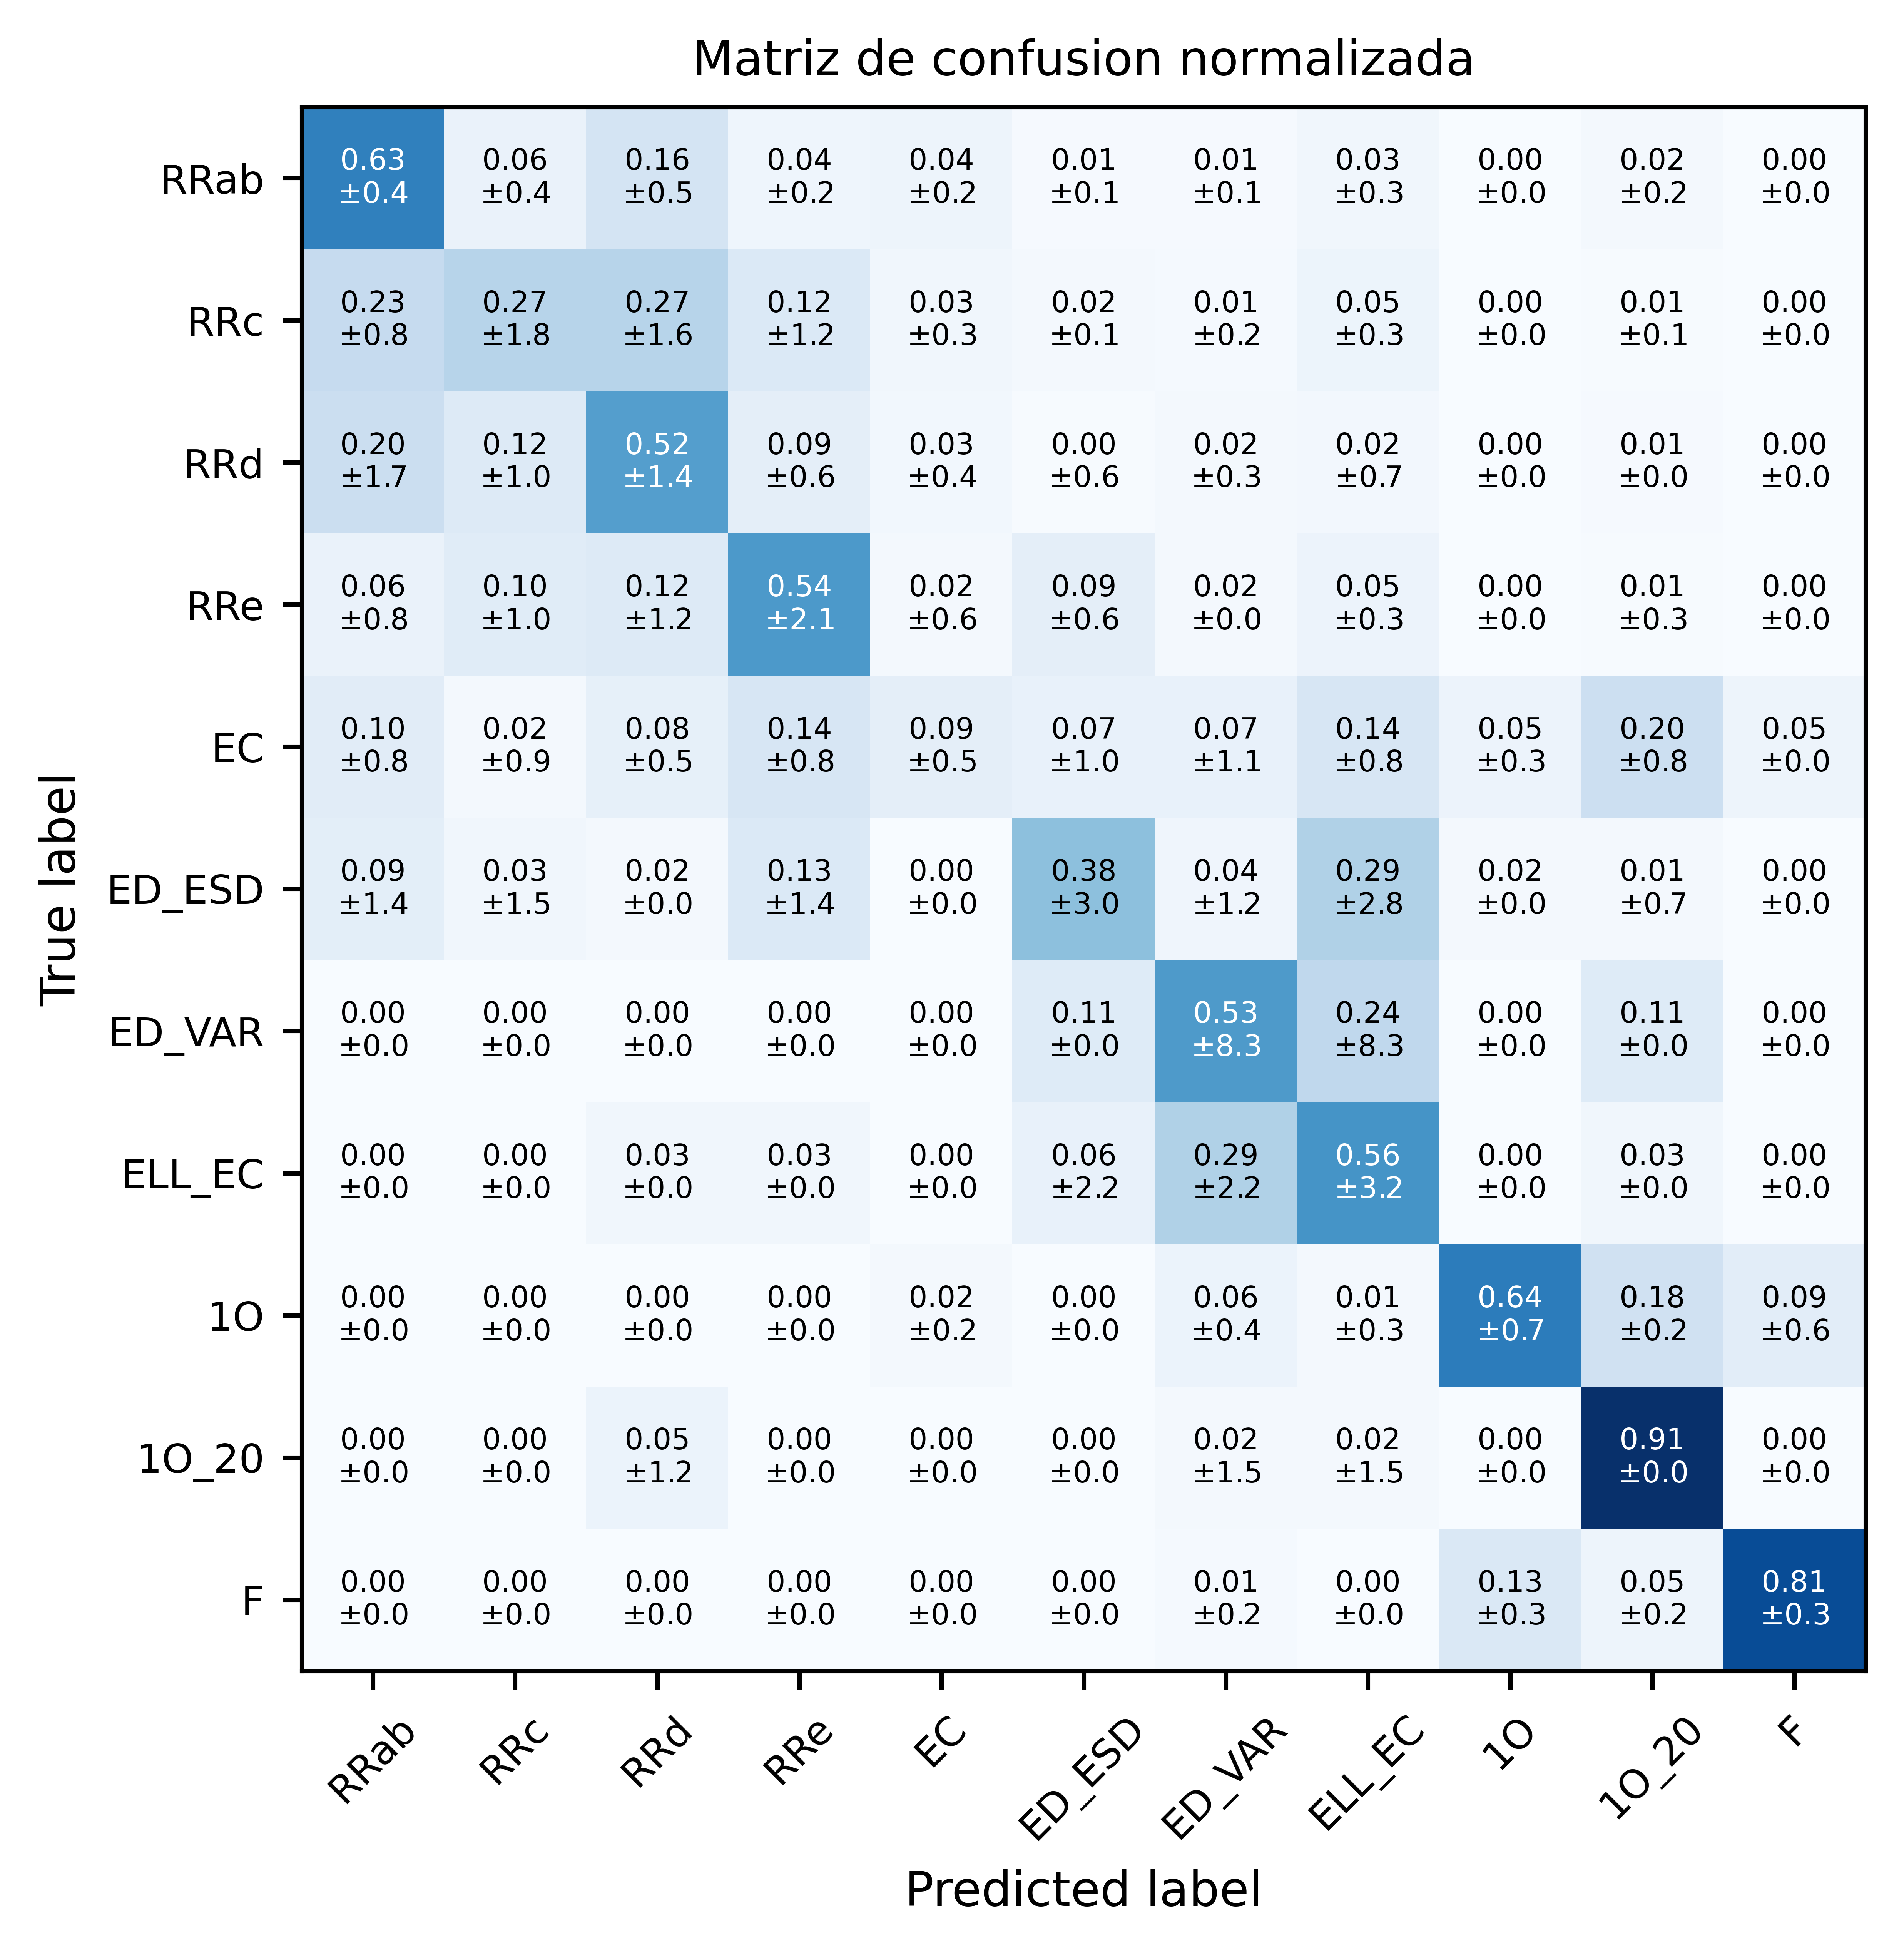

In [19]:
plt.figure(figsize=(5,5), dpi=1000)
plt.title("Matriz de confusion normalizada", fontsize = 9)
plot_confusion_matrix_2(matrices(conf_mat_BRF_subclases)[0], matrices(conf_mat_BRF_subclases)[1], classes=target_final, fontsize_valores=5.5, fontsize_label=7.5, fontsize_eje=9)